# 8. Neural networks and deep learning
This week, we'll learn about neural nets and build a model for classifying images of clothes

## 8.1 Fashion classification
Dataset:

- Full: https://github.com/alexeygrigorev/clothing-dataset
- Small: https://github.com/alexeygrigorev/clothing-dataset-small
Links:

https://cs231n.github.io/

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 11.79 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## 8.2 TensorFlow and Keras
- Installing TensorFlow
- Loading images

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

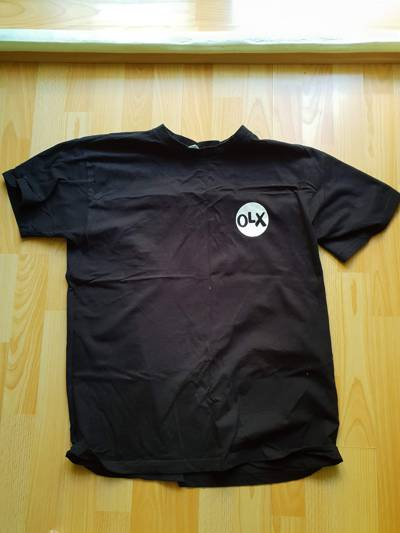

In [4]:
from tensorflow.keras.preprocessing.image import load_img
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [10]:
img = load_img(fullname, target_size=(299, 299))

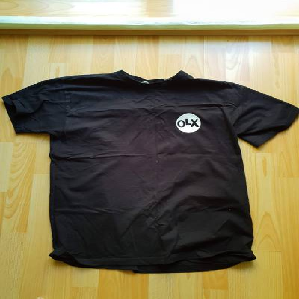

In [11]:
img

In [12]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks
- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [5]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [13]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [14]:
X = preprocess_input(X)

In [15]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [16]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139995),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

## 8.4 Convolutional neural networks
- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers
- There are more layers.
- Read here: https://cs231n.github.io/

## 8.5 Transfer learning
- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)
-
(Better to run it with a GPU)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [19]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)


Found 3068 images belonging to 10 classes.


In [20]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [21]:
X, y = next(train_ds)
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)


Found 341 images belonging to 10 classes.


In [23]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [24]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [25]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 225ms/step - accuracy: 0.5919 - loss: 1.5791 - val_accuracy: 0.7625 - val_loss: 0.9598
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8089 - loss: 0.6106 - val_accuracy: 0.7625 - val_loss: 0.7993
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8557 - loss: 0.4078 - val_accuracy: 0.7947 - val_loss: 0.9485
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8965 - loss: 0.2992 - val_accuracy: 0.8094 - val_loss: 0.7874
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9366 - loss: 0.1689 - val_accuracy: 0.7859 - val_loss: 1.1010
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9425 - loss: 0.1673 - val_accuracy: 0.8211 - val_loss: 0.8274
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9678 - loss: 0.1009 - val_accuracy: 0.8035 - val_loss: 0.9579
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9870 - loss: 0.0402 - val_accuracy: 0.8094 - val_los

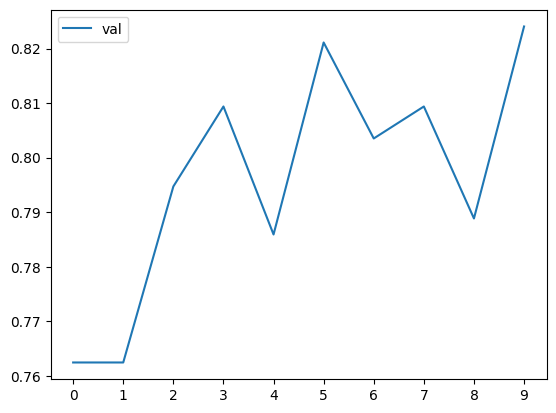

In [26]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate
- What's the learning rate
- Trying different values

In [27]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model


In [26]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - accuracy: 0.2189 - loss: 2.2489 - val_accuracy: 0.4868 - val_loss: 1.6476
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.5534 - loss: 1.4730 - val_accuracy: 0.6012 - val_loss: 1.2673
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.6419 - loss: 1.1745 - val_accuracy: 0.6598 - val_loss: 1.0763
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.6863 - loss: 1.0237 - val_accuracy: 0.6891 - val_loss: 0.9606
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.7106 - loss: 0.9199 - val_accuracy: 0.7361 - val_loss: 0.8871
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.7345 - loss: 0.8485 - val_accuracy: 0.7507 - val_loss: 0.8314
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.7493 - loss: 0.7947 - val_accuracy: 0.7625 - val_loss: 0.7893
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.7656 - loss: 0.7494 - val_accura

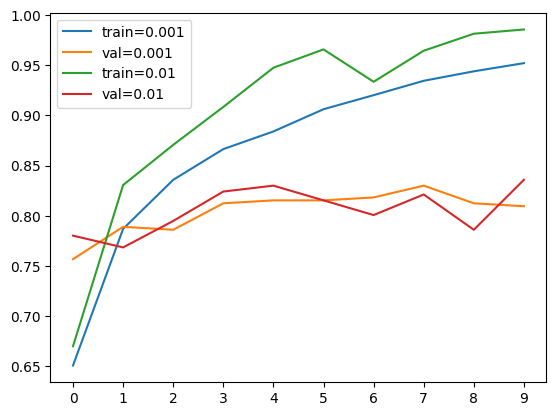

In [31]:
# del scores[0.1]
# del scores[0.0001]
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

## 8.7 Checkpointing
- Saving the best model only
-
Training a model with callbacks

In [28]:
model.save_weights('model_v1.weights.h5')


In [29]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',  # Use .keras
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


In [30]:

learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 164ms/step - accuracy: 0.4950 - loss: 1.4660 - val_accuracy: 0.7859 - val_loss: 0.7183
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.7891 - loss: 0.6320 - val_accuracy: 0.7683 - val_loss: 0.6579
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8306 - loss: 0.5141 - val_accuracy: 0.8152 - val_loss: 0.5962
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.8681 - loss: 0.4119 - val_accuracy: 0.8065 - val_loss: 0.5756
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8953 - loss: 0.3629 - val_accuracy: 0.8123 - val_loss: 0.5622
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.9062 - loss: 0.3360 - val_accuracy: 0.8035 - val_loss: 0.5641
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9233 - loss: 0.2809 - val_accuracy: 0.8152 - val_loss: 0.5548
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9376 - loss: 0.2480 - val_accuracy: 0.8

##8.8 Adding more layers
- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [31]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [42]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.2307 - loss: 2.0545 - val_accuracy: 0.3930 - val_loss: 1.5960
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.5149 - loss: 1.4564 - val_accuracy: 0.5806 - val_loss: 1.1947
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.6308 - loss: 1.0967 - val_accuracy: 0.6364 - val_loss: 1.0541
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.7109 - loss: 0.9250 - val_accuracy: 0.7302 - val_loss: 0.9208
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.7635 - loss: 0.7630 - val_accuracy: 0.7713 - val_loss: 0.8247
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.8044 - loss: 0.6456 - val_accuracy: 0.7595 - val_loss: 0.7672
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.8135 - loss: 0.5870 - val_accuracy: 0.7507 - val_loss: 0.7664
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8487 - loss: 0.4908 - val_accuracy: 0.

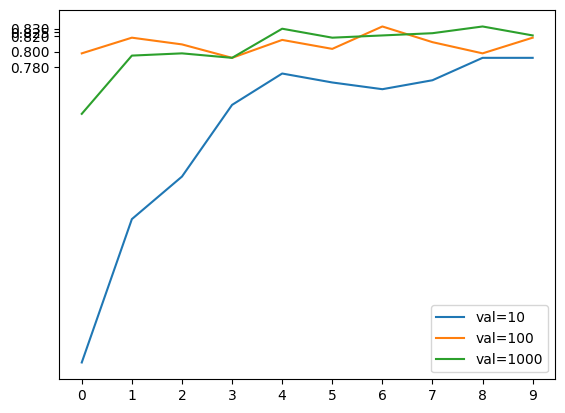

In [43]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

##8.9 Regularization and dropout
- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

**We are forcing the model to concentrate on overall structure of the object not on patterns or logos of the object**

In [32]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [45]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.5778 - loss: 1.2686 - val_accuracy: 0.8006 - val_loss: 0.6277
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.8154 - loss: 0.5271 - val_accuracy: 0.8006 - val_loss: 0.5519
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.8837 - loss: 0.3528 - val_accuracy: 0.8240 - val_loss: 0.5474
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9215 - loss: 0.2583 - val_accuracy: 0.8094 - val_loss: 0.5356
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9551 - loss: 0.1868 - val_accuracy: 0.8211 - val_loss: 0.5571
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9697 - loss: 0.1287 - val_accuracy: 0.8270 - val_loss: 0.5568
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9849 - loss: 0.0939 - val_accuracy: 0.8123 - val_loss: 0.5832
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9910 - loss: 0.0670 - val_accuracy: 

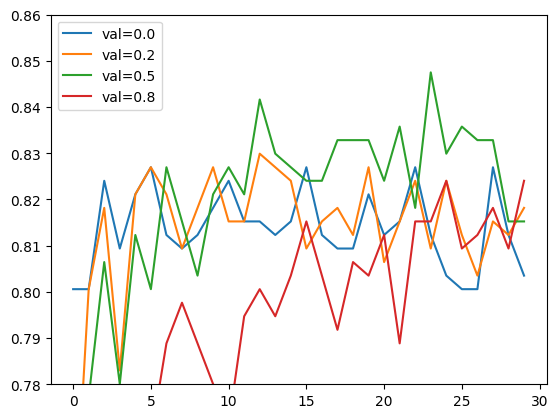

In [46]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

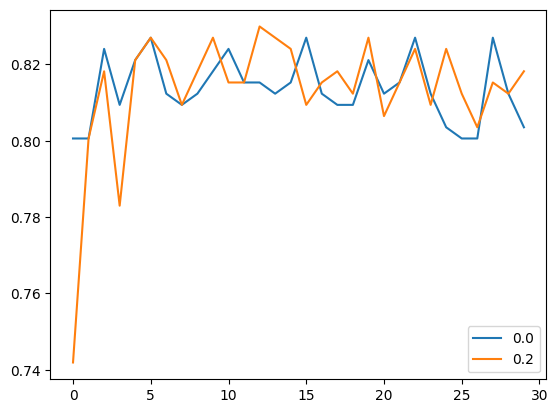

In [47]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

##8.10 Data augmentation
- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?

In [33]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [34]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.4954 - loss: 1.4739 - val_accuracy: 0.7419 - val_loss: 0.7984
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.7263 - loss: 0.8104 - val_accuracy: 0.7713 - val_loss: 0.7309
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.7788 - loss: 0.6689 - val_accuracy: 0.7771 - val_loss: 0.6389
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.8097 - loss: 0.5776 - val_accuracy: 0.7889 - val_loss: 0.6401
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.8198 - loss: 0.5284 - val_accuracy: 0.8035 - val_loss: 0.6065
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.8493 - loss: 0.4402 - val_accuracy: 0.7859 - val_loss: 0.6336
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.8617 - loss: 0.4006 - val_accuracy: 0.7947 - val_loss: 0.6238
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8721 - loss: 0.3877 - val_accuracy: 0.79

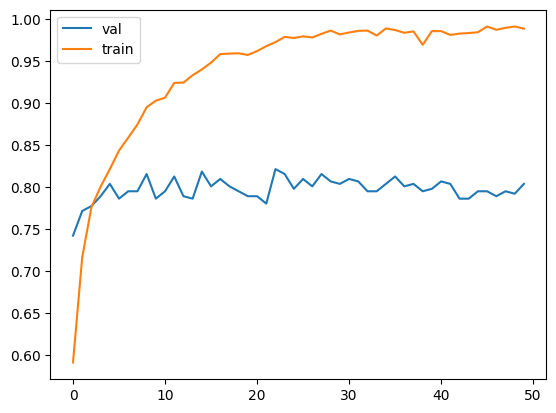

In [35]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

##8.11 Training a larger model
- Train a 299x299 model

In [44]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [40]:
input_size = 299


In [41]:

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [42]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


In [45]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.5424 - loss: 1.4496 - val_accuracy: 0.8299 - val_loss: 0.5428
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 759ms/step - accuracy: 0.8276 - loss: 0.5516 - val_accuracy: 0.8446 - val_loss: 0.4387
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 767ms/step - accuracy: 0.8619 - loss: 0.4166 - val_accuracy: 0.8710 - val_loss: 0.4150
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 772ms/step - accuracy: 0.8802 - loss: 0.3830 - val_accuracy: 0.8827 - val_loss: 0.3874
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 768ms/step - accuracy: 0.8812 - loss: 0.3354 - val_accuracy: 0.8768 - val_loss: 0.3935
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 782ms/step - accuracy: 0.8942 - loss: 0.3134 - val_accuracy: 0.8739 - val_loss: 0.3858
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 769ms/step - accuracy: 0.9106 - loss: 0.2716 - val_accuracy: 0.8768 - val_loss: 0.3558
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 744ms/step - accuracy: 0.8988 - loss: 0.2904 - val_accuracy: 0.8592 

KeyboardInterrupt: 

##8.12 Using the model
- Loading the model
- Evaluating the model
- Getting predictions


In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [48]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [49]:
model = keras.models.load_model('xception_v4_1_21_0.891.keras')


In [50]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8619 - loss: 0.3779


[0.2773075997829437, 0.897849440574646]

In [51]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(299, 299))

In [52]:
import numpy as np
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [53]:
X = preprocess_input(X)


In [54]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [55]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]


In [56]:
dict(zip(classes, pred[0]))

{'dress': -3.2728808,
 'hat': -3.9003487,
 'longsleeve': -2.4019682,
 'outwear': -3.1364918,
 'pants': 9.959305,
 'shirt': -2.4502203,
 'shoes': -3.1307783,
 'shorts': 3.7858362,
 'skirt': -4.590375,
 't-shirt': -2.4342124}

**'pants': 9.959305**

##8.13 Summary
- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model (150x150) before training a big one (299x299)
- Learning rate - how fast the model trians. Fast learners aren't always best ones
- We can save the best model using callbacks and checkpointing
- To avoid overfitting, use dropout and augmentation
##8.14 Explore more
- Add more data, e.g. Zalando, etc (ADD LINKS)
- Albumentations - another way of generating augmentations
- Use PyTorch or MXNet instead of TensorFlow/Keras
- In addition to Xception, there are others architectures - try them

Other projects:

cats vs dogs
Hotdog vs not hotdog
Category of images